In [1]:
import pandas as pd
import numpy as np
import ast
import pickle as pkl
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error,root_mean_squared_error,r2_score,mean_squared_error

In [2]:
df=pd.read_csv("Carbon Emission.csv")

# **DATA PREPROCESSING**

### **1.DATA UNDERSTANDING**

In [3]:
df.dtypes

Body Type                        object
Sex                              object
Diet                             object
How Often Shower                 object
Heating Energy Source            object
Transport                        object
Vehicle Type                     object
Social Activity                  object
Monthly Grocery Bill              int64
Frequency of Traveling by Air    object
Vehicle Monthly Distance Km       int64
Waste Bag Size                   object
Waste Bag Weekly Count            int64
How Long TV PC Daily Hour         int64
How Many New Clothes Monthly      int64
How Long Internet Daily Hour      int64
Energy efficiency                object
Recycling                        object
Cooking_With                     object
CarbonEmission                    int64
dtype: object

In [4]:
df.columns

Index(['Body Type', 'Sex', 'Diet', 'How Often Shower', 'Heating Energy Source',
       'Transport', 'Vehicle Type', 'Social Activity', 'Monthly Grocery Bill',
       'Frequency of Traveling by Air', 'Vehicle Monthly Distance Km',
       'Waste Bag Size', 'Waste Bag Weekly Count', 'How Long TV PC Daily Hour',
       'How Many New Clothes Monthly', 'How Long Internet Daily Hour',
       'Energy efficiency', 'Recycling', 'Cooking_With', 'CarbonEmission'],
      dtype='object')

In [5]:
df.head(15)

,Body Type,Sex,Diet,How Often Shower,Heating Energy Source,Transport,Vehicle Type,Social Activity,Monthly Grocery Bill,Frequency of Traveling by Air,Vehicle Monthly Distance Km,Waste Bag Size,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,Energy efficiency,Recycling,Cooking_With,CarbonEmission
0,overweight,female,pescatarian,daily,coal,public,NaN,often,230,frequently,210,large,4,7,26,1,No,['Metal'],"['Stove', 'Oven']",2238
1,obese,female,vegetarian,less frequently,natural gas,walk/bicycle,NaN,often,114,rarely,9,extra large,3,9,38,5,No,['Metal'],"['Stove', 'Microwave']",1892
2,overweight,male,omnivore,more frequently,wood,private,petrol,never,138,never,2472,small,1,14,47,6,Sometimes,['Metal'],"['Oven', 'Microwave']",2595
3,overweight,male,omnivore,twice a day,wood,walk/bicycle,NaN,sometimes,157,rarely,74,medium,3,20,5,7,Sometimes,"['Paper', 'Plastic', 'Glass', 'Metal']","['Microwave', 'Grill', 'Airfryer']",1074
4,obese,female,vegetarian,daily,coal,private,diesel,often,266,very frequently,8457,large,1,3,5,6,Yes,['Paper'],['Oven'],4743
5,overweight,male,vegetarian,less frequently,wood,public,NaN,sometimes,144,frequently,658,large,1,22,18,9,Sometimes,"['Paper', 'Glass', 'Metal']","['Stove', 'Oven', 'Microwave']",1647
6,underweight,female,vegan,less frequently,wood,private,hybrid,never,56,rarely,5363,medium,4,9,11,19,Sometimes,[],"['Grill', 'Airfryer']",1832
7,underweight,female,vegan,more frequently,coal,walk/bicycle,NaN,sometimes,59,very frequently,54,extra large,3,5,39,15,No,"['Paper', 'Plastic', 'Glass']","['Stove', 'Microwave']",2322
8,overweight,male,omnivore,daily,wood,public,NaN,never,200,frequently,1376,medium,3,3,31,15,Yes,['Glass'],"['Microwave', 'Grill', 'Airfryer']",2494
9,underweight,female,pescatarian,daily,wood,public,NaN,often,135,rarely,440,extra large,1,8,23,18,Sometimes,['Glass'],"['Microwave', 'Grill', 'Airfryer']",1178


In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.isnull().sum()

Body Type                           0
Sex                                 0
Diet                                0
How Often Shower                    0
Heating Energy Source               0
Transport                           0
Vehicle Type                     6721
Social Activity                     0
Monthly Grocery Bill                0
Frequency of Traveling by Air       0
Vehicle Monthly Distance Km         0
Waste Bag Size                      0
Waste Bag Weekly Count              0
How Long TV PC Daily Hour           0
How Many New Clothes Monthly        0
How Long Internet Daily Hour        0
Energy efficiency                   0
Recycling                           0
Cooking_With                        0
CarbonEmission                      0
dtype: int64

### **2.HANDLE MISSING VALUES**


In [8]:
df['Vehicle Type']=df['Vehicle Type'].fillna(df['Vehicle Type'].mode())

In [9]:
df.describe()

,Monthly Grocery Bill,Vehicle Monthly Distance Km,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,CarbonEmission
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,173.875200,2031.485900,4.024600,12.139200,25.109000,11.889100,2269.147300
std,72.234018,2769.715597,1.990375,7.106369,14.698725,7.277218,1017.675247
min,50.000000,0.000000,1.000000,0.000000,0.000000,0.000000,306.000000
25%,111.000000,69.000000,2.000000,6.000000,13.000000,6.000000,1538.000000
50%,173.000000,823.000000,4.000000,12.000000,25.000000,12.000000,2080.000000
75%,237.000000,2516.750000,6.000000,18.000000,38.000000,18.000000,2768.000000
max,299.000000,9999.000000,7.000000,24.000000,50.000000,24.000000,8377.000000


### **3.OUTLIER DETECTION&REMOVAL**

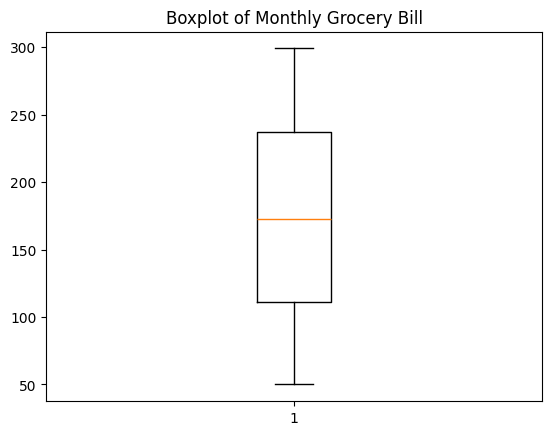

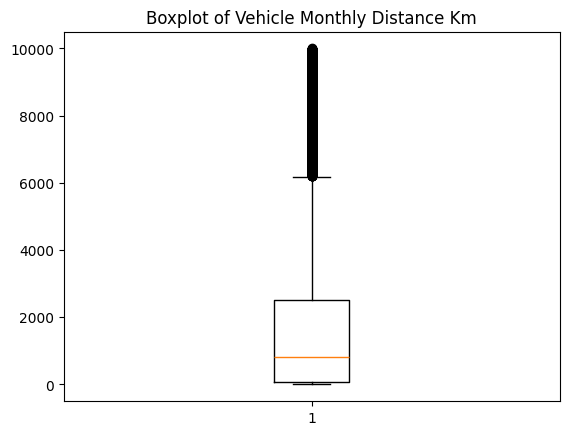

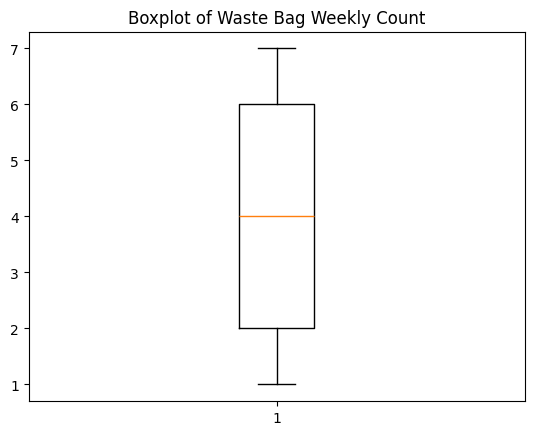

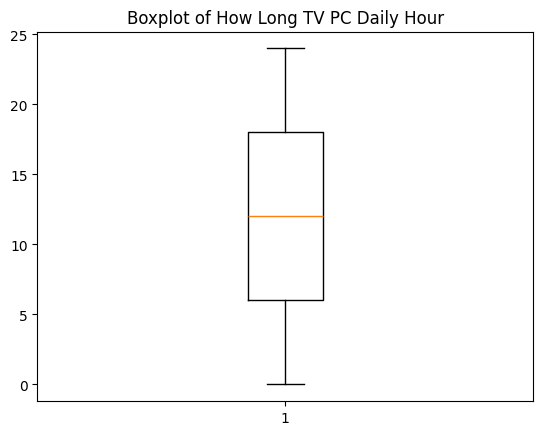

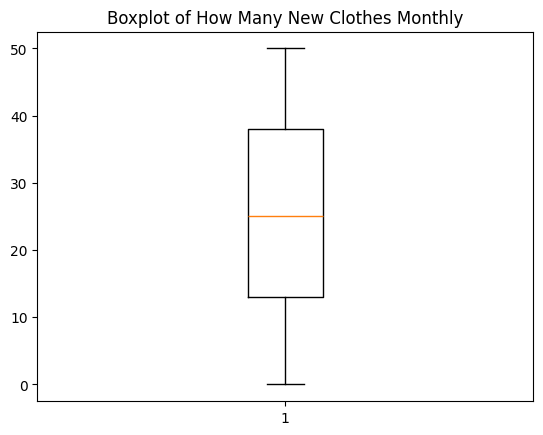

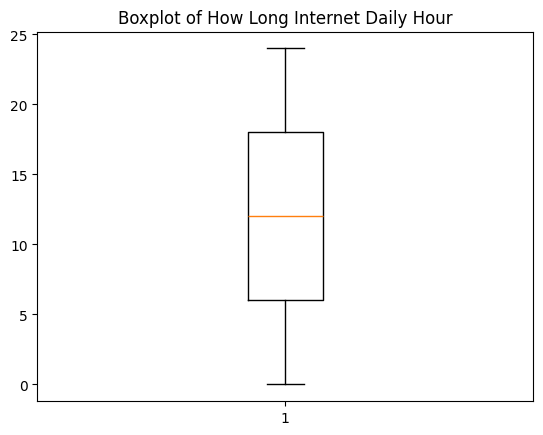

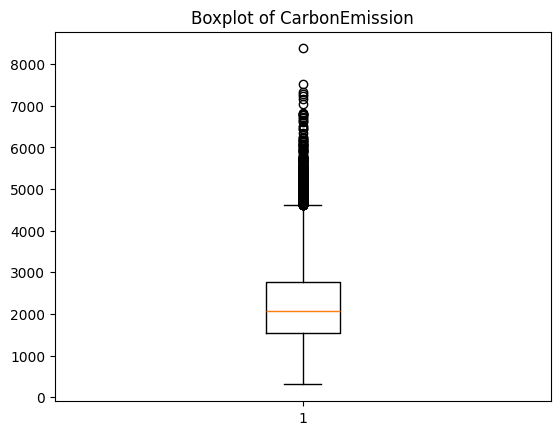

In [10]:
for i in df.columns:
    if df[i].dtype in ['int64','float64']:
        plt.boxplot(df[i])
        plt.title(f"Boxplot of {i}")
        plt.show()

# *ENCODING*

In [11]:
lst_heating=list(df['Heating Energy Source'].unique())

In [12]:
lst_diet=list(df['Diet'].unique())

In [13]:
lst_transport=list(df['Transport'].unique())

In [14]:
lst_vehicle=list(df['Vehicle Type'].unique())

In [15]:
print(lst_diet)

['pescatarian', 'vegetarian', 'omnivore', 'vegan']


**1.ONEHOT ENCODING**

In [16]:
onehot=OneHotEncoder(drop='first',sparse_output=False)
res=onehot.fit_transform(df[['Diet','Heating Energy Source','Transport','Vehicle Type']])


In [17]:
df.drop(columns=['Diet','Heating Energy Source','Transport','Vehicle Type'],inplace=True)

In [18]:
res=pd.DataFrame(res,columns=onehot.get_feature_names_out(),dtype='int')

In [19]:
df.reset_index(inplace=True,drop=True)

In [20]:
df=df.join(res)

**2.ORDINAL ENCODING(MAPING)**

In [21]:
df['Frequency of Traveling by Air'].unique()

array(['frequently', 'rarely', 'never', 'very frequently'], dtype=object)

In [22]:
df['Energy efficiency'].unique()

array(['No', 'Sometimes', 'Yes'], dtype=object)

In [23]:
df['Waste Bag Size'].unique()

array(['large', 'extra large', 'small', 'medium'], dtype=object)

In [24]:
df['How Often Shower'].unique()

array(['daily', 'less frequently', 'more frequently', 'twice a day'],
      dtype=object)

In [25]:
shower={"daily":0,"less frequently":1,"twice a day":2,"more frequently":3}
df['How Often Shower']=df['How Often Shower'].map(shower)

In [26]:
waste_bag={"small":0,"medium":1,"large":2,"extra large":3}
df['Waste Bag Size']=df['Waste Bag Size'].map(waste_bag)

In [27]:
traveling_air={"never":0,"rarely":1,"frequently":2,"very frequently":3}
df['Frequency of Traveling by Air']=df['Frequency of Traveling by Air'].map(traveling_air)

In [28]:
energy_efficiency={"No":0,"Sometimes":1,"Yes":2}
df['Energy efficiency']=df['Energy efficiency'].map(energy_efficiency)

In [29]:
df.columns

Index(['Body Type', 'Sex', 'How Often Shower', 'Social Activity',
       'Monthly Grocery Bill', 'Frequency of Traveling by Air',
       'Vehicle Monthly Distance Km', 'Waste Bag Size',
       'Waste Bag Weekly Count', 'How Long TV PC Daily Hour',
       'How Many New Clothes Monthly', 'How Long Internet Daily Hour',
       'Energy efficiency', 'Recycling', 'Cooking_With', 'CarbonEmission',
       'Diet_pescatarian', 'Diet_vegan', 'Diet_vegetarian',
       'Heating Energy Source_electricity',
       'Heating Energy Source_natural gas', 'Heating Energy Source_wood',
       'Transport_public', 'Transport_walk/bicycle', 'Vehicle Type_electric',
       'Vehicle Type_hybrid', 'Vehicle Type_lpg', 'Vehicle Type_petrol',
       'Vehicle Type_nan'],
      dtype='object')

**3.MULTILABEL ENCODING**

In [30]:
df['Recycling']=df['Recycling'].apply(lambda x:ast.literal_eval(x))
df['Cooking_With']=df['Cooking_With'].apply(lambda x:ast.literal_eval(x))

In [31]:
df['Recycling'].values

array([list(['Metal']), list(['Metal']), list(['Metal']), ...,
       list(['Paper', 'Plastic', 'Metal']), list(['Paper', 'Metal']),
       list(['Plastic', 'Glass', 'Metal'])], dtype=object)

In [32]:
lst_recycling = list(set([item for sublist in df['Recycling'].values for item in sublist]))

In [33]:
lst_cooking=list(set([item for sublist in df['Cooking_With'].values for item in sublist]))

In [34]:
mb_recycling=MultiLabelBinarizer(sparse_output=False)
res=mb_recycling.fit_transform(df['Recycling'])

In [35]:
res=pd.DataFrame(res,columns=mb_recycling.classes_)

In [36]:
df.drop(columns=['Recycling'],inplace=True)

In [37]:
df.reset_index(inplace=True,drop=True)

In [38]:
df=df.join(res)

In [39]:
mb_cooking=MultiLabelBinarizer(sparse_output=False)
res1=mb_cooking.fit_transform(df['Cooking_With'])

In [40]:
res1=pd.DataFrame(res1,columns=mb_cooking.classes_)

In [41]:
df.drop(columns='Cooking_With',inplace=True)

In [42]:
df.reset_index(inplace=True,drop=True)

In [43]:
df=df.join(res1)

In [44]:
df.columns

Index(['Body Type', 'Sex', 'How Often Shower', 'Social Activity',
       'Monthly Grocery Bill', 'Frequency of Traveling by Air',
       'Vehicle Monthly Distance Km', 'Waste Bag Size',
       'Waste Bag Weekly Count', 'How Long TV PC Daily Hour',
       'How Many New Clothes Monthly', 'How Long Internet Daily Hour',
       'Energy efficiency', 'CarbonEmission', 'Diet_pescatarian', 'Diet_vegan',
       'Diet_vegetarian', 'Heating Energy Source_electricity',
       'Heating Energy Source_natural gas', 'Heating Energy Source_wood',
       'Transport_public', 'Transport_walk/bicycle', 'Vehicle Type_electric',
       'Vehicle Type_hybrid', 'Vehicle Type_lpg', 'Vehicle Type_petrol',
       'Vehicle Type_nan', 'Glass', 'Metal', 'Paper', 'Plastic', 'Airfryer',
       'Grill', 'Microwave', 'Oven', 'Stove'],
      dtype='object')

In [45]:
df

,Body Type,Sex,How Often Shower,Social Activity,Monthly Grocery Bill,Frequency of Traveling by Air,Vehicle Monthly Distance Km,Waste Bag Size,Waste Bag Weekly Count,How Long TV PC Daily Hour,...,Vehicle Type_nan,Glass,Metal,Paper,Plastic,Airfryer,Grill,Microwave,Oven,Stove
0,overweight,female,0,often,230,2,210,2,4,7,...,0,0,1,0,0,0,0,0,1,1
1,obese,female,1,often,114,1,9,3,3,9,...,1,0,1,0,0,0,0,1,0,1
2,overweight,male,3,never,138,0,2472,0,1,14,...,0,0,1,0,0,0,0,1,1,0
3,overweight,male,2,sometimes,157,1,74,1,3,20,...,1,1,1,1,1,1,1,1,0,0
4,obese,female,0,often,266,3,8457,2,1,3,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,obese,male,2,sometimes,230,0,268,1,5,12,...,0,0,0,0,0,0,0,1,0,0
9996,normal,female,2,never,234,2,5316,3,3,14,...,0,0,0,1,1,0,0,1,0,1
9997,overweight,female,0,sometimes,298,3,96,3,5,11,...,1,0,1,1,1,1,1,1,0,0
9998,underweight,male,3,often,179,1,8688,1,5,19,...,0,0,1,1,0,1,1,1,0,1


# *FEATURE SELECTION*

In [46]:
x=df.drop(columns=['Body Type','Sex','Social Activity','How Long TV PC Daily Hour','CarbonEmission','How Long TV PC Daily Hour','How Long Internet Daily Hour'])

In [47]:
y=df['CarbonEmission']

# *SCALING*

In [48]:
standard=StandardScaler()
x_scaled=standard.fit_transform(x)

# *SPLIT DATA*

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,random_state=42)

In [50]:
x_scaled.shape

(10000, 30)

# **MODEL SELECTION&EVALUATION**

**1.LINEAR REGRESSION**

In [51]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [52]:
y_pred=model.predict(x_test)

In [53]:
print(f"Mean Absolute Error:{mean_absolute_error(y_test,y_pred)}")
print(f"Root Mean Squared Error:{root_mean_squared_error(y_test,y_pred)}")
print(f"r2 Score:{r2_score(y_test,y_pred)}")
print(f"Mean Squared Error:{mean_squared_error(y_test,y_pred)}")

Mean Absolute Error:302.8017471393345
Root Mean Squared Error:402.899447768711
r2 Score:0.8431241987275521
Mean Squared Error:162327.9650123323


**2.POLYNOMIAL REGRESSION**

In [54]:
poly=PolynomialFeatures(degree=2)
x_train_pol=poly.fit_transform(x_train)
x_test_pol=poly.fit_transform(x_test)

In [55]:
model=LinearRegression()
model.fit(x_train_pol,y_train)

LinearRegression()

In [56]:
y_pred_pol=model.predict(x_test_pol)

In [57]:
print(f"Mean Absolute Error:{mean_absolute_error(y_test,y_pred_pol)}")
print(f"Root Mean Squared Error:{root_mean_squared_error(y_test,y_pred_pol)}")
print(f"r2 Score:{r2_score(y_test,y_pred_pol)}")
print(f"Mean Squared Error:{mean_squared_error(y_test,y_pred_pol)}")

Mean Absolute Error:242.62038709566136
Root Mean Squared Error:321.0654164615385
r2 Score:0.9003792816609812
Mean Squared Error:103083.00164762116


**3.SVR,K NEIGHBOURS REGRESSOR&DECISION TREE REGRESSOR**

In [58]:
models=[SVR(),KNeighborsRegressor(),DecisionTreeRegressor()]
for model in models:
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(f"{model}")
    print("*"*100)
    print(f"Mean Absolute Error:{mean_absolute_error(y_test,y_pred)}")
    print(f"Root Mean Squared Error:{root_mean_squared_error(y_test,y_pred)}")
    print(f"r2 Score:{r2_score(y_test,y_pred)}")
    print(f"Mean Squared Error:{mean_squared_error(y_test,y_pred)}")

SVR()
****************************************************************************************************
Mean Absolute Error:708.320427055723
Root Mean Squared Error:970.9954872691536
r2 Score:0.08883498586729255
Mean Squared Error:942832.236297061
KNeighborsRegressor()
****************************************************************************************************
Mean Absolute Error:446.55813333333333
Root Mean Squared Error:591.4852640373498
r2 Score:0.6618958733840274
Mean Squared Error:349854.81757333333
DecisionTreeRegressor()
****************************************************************************************************
Mean Absolute Error:425.165
Root Mean Squared Error:561.799011806417
r2 Score:0.6949826421848624
Mean Squared Error:315618.1296666667


**4.RANDOM FOREST REGRESSOR&GRADIENT BOOSTING REGRESSOR**

In [59]:
# Define models
rf = RandomForestRegressor(random_state=42, n_estimators=200, max_depth=None)
gb = GradientBoostingRegressor(random_state=42, n_estimators=200, learning_rate=0.1, max_depth=3)

# Fit models
rf.fit(x_train, y_train)
gb.fit(x_train, y_train)

# Predictions
rf_pred = rf.predict(x_test)
gb_pred = gb.predict(x_test)

# Function to evaluate models
def evaluate(y_test, y_pred, model_name):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    print(f"{model_name}")
    print("*" * 100)
    print(f"Mean Absolute Error: {mae:.3f}")
    print(f"Root Mean Squared Error: {rmse:.3f}")
    print(f"r2 Score: {r2:.3f}")
    print(f"Mean Squared Error: {mse:.3f}")
    print()

# Evaluate
evaluate(y_test, rf_pred, "RandomForestRegressor")
evaluate(y_test, gb_pred, "GradientBoostingRegressor")


RandomForestRegressor
****************************************************************************************************
Mean Absolute Error: 286.263
Root Mean Squared Error: 374.391
r2 Score: 0.865
Mean Squared Error: 140168.580

GradientBoostingRegressor
****************************************************************************************************
Mean Absolute Error: 249.217
Root Mean Squared Error: 330.502
r2 Score: 0.894
Mean Squared Error: 109231.656



# *HYPERPARAMETER TUNING*

In [60]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1, 0.2]
}

grid = GridSearchCV(GradientBoostingRegressor(random_state=42),
                    param_grid,
                    cv=5,
                    scoring='r2',
                    n_jobs=-1)
grid.fit(x_train, y_train)

print("Best params:", grid.best_params_)
print("Best CV R²:", grid.best_score_)


Best params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
Best CV R²: 0.8948123997716108


# **FINAL MODEL**

In [61]:
poly_final=PolynomialFeatures(degree=2)
x_train_pol=poly_final.fit_transform(x_train)
x_test_pol=poly_final.fit_transform(x_test)

In [62]:
final_model=LinearRegression()
final_model.fit(x_train_pol,y_train)

LinearRegression()

In [63]:
y_pred_pol=final_model.predict(x_test_pol)

In [64]:
print(f"Mean Absolute Error:{mean_absolute_error(y_test,y_pred_pol)}")
print(f"Root Mean Squared Error:{root_mean_squared_error(y_test,y_pred_pol)}")
print(f"r2 Score:{r2_score(y_test,y_pred_pol)}")
print(f"Mean Squared Error:{mean_squared_error(y_test,y_pred_pol)}")

Mean Absolute Error:242.62038709566136
Root Mean Squared Error:321.0654164615385
r2 Score:0.9003792816609812
Mean Squared Error:103083.00164762116


# **MODEL PACKING FOR DEPLOYMENT**


In [65]:
data={"model":final_model,
      "poly":poly_final,
      "onehot":onehot,
      "list_recycling":lst_recycling,
      "list_cooking":lst_cooking,
      "mb_recycling":mb_recycling,
      "mb_cooking":mb_cooking,
      "scaler":standard,
      "diet":lst_diet,
      "heat":lst_heating,
      "transport":lst_transport,
      "vehicle_type":lst_vehicle
      }

# **EXPORTING MODEL AND OBJECTS WITH PICKLE**

In [66]:
with open("carbon.pkl","wb") as obj1:
    pkl.dump(data,obj1)